# Assignment 3.3

Group: Mathias Husted, Luciana Amarante, Leonie Kochs

We'll start by importing our functions from last time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(x, nodes, k):
    f = 1 # Neutral element for multiplication
    for i in range(0, len(nodes)):
        if i != k:
            f *= (x-nodes[i]) / (nodes[k] - nodes[i])
    return f

def lagrange_interpolation(x, nodes, function_values):
    if len(nodes) != len(function_values):
        raise("Error: Nodes list must be as long as function_values")
    f = 0 # Neutral element for addition
    for i in range(0, len(nodes)):
        f += function_values[i] * lagrange(x, nodes, i)
    return f

For this assignment, we'll be numerically measuring the approximation error by using a discrete version of the Chebyshev distance (maximum metric). The interval given is $[a,b] = [-5,5]$

$$
||f||_h := \max\limits_{i \in \{0,...,1000\}} \Bigg | f \Bigg (a+\frac{i(b-a)}{1000} \Bigg ) \Bigg |
$$

Furthermore, we'll use the equidistant nodes

$$
x_i = a + \frac{i(b-a)}{n}, \text{ for } i \in {0,...,n}
$$

### a)
### i)
$$
f(x) := sin(x)
$$

We'll analyze the approximation error $||f-p_n||_h$ for $n \rightarrow \infty$ using $n \in \{1,...,100\}$

First, let's create our discrete Chebyshev distance function

In [2]:
# Interval
a,b = -5,5

def sin(x):
    return np.sin(x)

# Generates an interval corresponding to our customly defined Chebyshev distance metric
def generate_interval(a, b, n):
    interval = []
    for i in range(n):
        point = a + (i * (b - a) / n)
        interval.append(point)
    return np.array(interval)

# Returns ||f - p_n||_h
def chebyshev(a, b, func, x_nodes):
    
    y_nodes = func(x_nodes)
    # Generates the interval we want to approximate using our lagrange function
    x_interval = generate_interval(a, b, 1000)

    y_interval = func(x_interval)
    interpolated_values = lagrange_interpolation(x_interval, x_nodes, y_nodes)

    return np.max(np.abs(y_interval - interpolated_values))

Then, our n will run from 1 to 100 and approximate the error in each cycle using our custom Chebyshev distance metric.

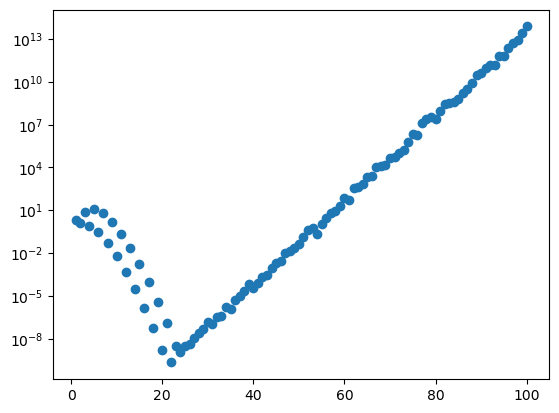

In [18]:
def run_ns(func):
    output = []
    for n in range(1,101):
        x_nodes = generate_interval(a, b, n)
        max = chebyshev(a, b, func, x_nodes)
        output.append(max)
    return output

data = run_ns(sin)

plt.scatter(range(1,101), data)
plt.yscale("log")

When we plot it logarithmically, we can generally see that our function achieves its best performance slightly above $n=20$. After that, issues surrounding floating point numbers start to creep in and skew the result slightly, until it becomes completely unusable beyond $n\ge50$.

### ii)

Now we'll do the exact same thing, but with the function

$$
f(x)=(1+x^2)^{-1}
$$

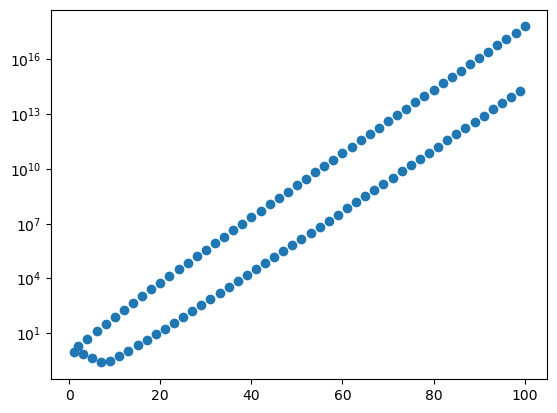

In [20]:
def new_func(x):
    return 1/(1 + x*x)

data = run_ns(new_func)

plt.scatter(range(1,101), data)
plt.yscale("log")

With this more complex function, our algorithm starts to seriously deteriorate already at $n=4$, however up until about $n=10$, it seems to remain somewhat usable for uneven numbers. This suggests that the algorithm is unstable and could possibly be improved by rearranging multiplications/divisions. 